<a href="https://colab.research.google.com/github/esrod/Python-Bootcamp/blob/main/Datatab_Netflix_Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pandas, numpy, matplolib ve seaborn kütüphanelerini yükleyip, NetflixOriginals.csv dosyasını dataframe olarak açıyoruz.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


NetflixOriginals = pd.read_csv("NetflixOriginals.csv",  encoding='ISO-8859-1')
NetflixOriginals.head()
NetflixOriginals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


Uzun soluklu filmlerin hangi dillerde oluşturulduğunu görselleştiriyoruz.

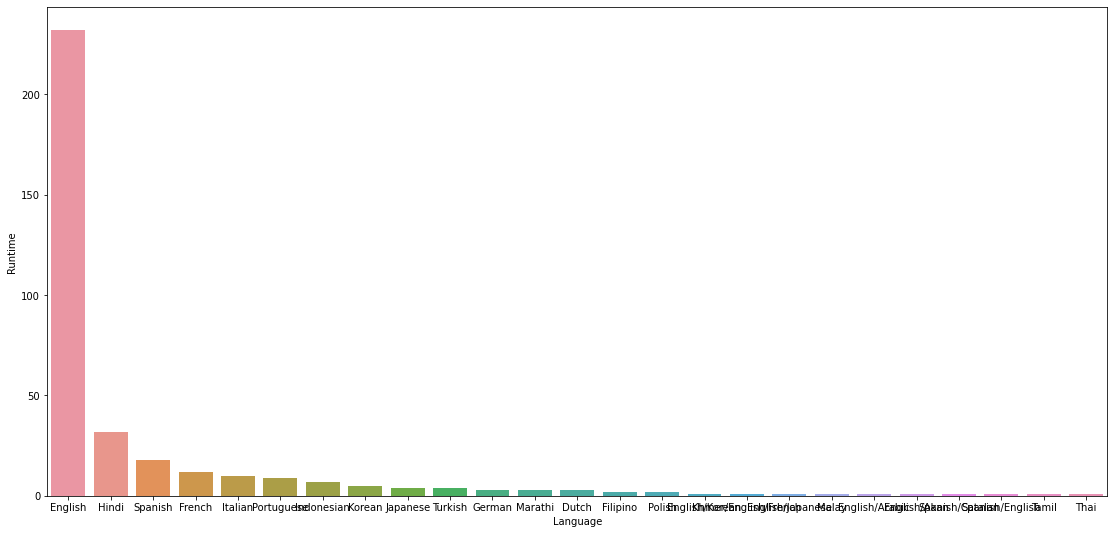

In [ ]:
uzun_soluklu = NetflixOriginals[(NetflixOriginals["Runtime"] > (NetflixOriginals["Runtime"].mean()))].groupby("Language").agg({"Runtime": "count"}).sort_values(by = "Runtime", ascending= False)
uzun_soluklu.reset_index(inplace=True)

plt.figure(figsize=(19,9))
us = sns.barplot(x="Language", y="Runtime", data=uzun_soluklu)

2019 Ocak ile 2020 Haziran tarihleri arasında "Documentary" türünde çekilmiş
filmlerin IMDB değerlerini gösteriyoruz.

In [ ]:
NetflixOriginals["Date"] = pd.to_datetime(NetflixOriginals.Premiere)
Documentary = NetflixOriginals.loc[(NetflixOriginals["Genre"] == "Documentary") & (NetflixOriginals["Date"] > "2019-01-31") & (NetflixOriginals["Date"] < "2020-06-01")]
Documentary

İngilizce çekilen filmeler içerisinde hangi türün en yüksek IMDB puanına sahip olduğunu buluyoruz.

In [ ]:
print(NetflixOriginals[NetflixOriginals["Language"] == "English"].sort_values(by = "IMDB Score", ascending = False).head(1))

                                        Title        Genre         Premiere  \
583  David Attenborough: A Life on Our Planet  Documentary  October 4, 2020   

     Runtime  IMDB Score Language       Date  
583       83         9.0  English 2020-10-04  


"Hindi" dilinde çekilmiş olan filmlerin ortalama "Runtime" suresini buluyoruz.

In [ ]:
print(NetflixOriginals[(NetflixOriginals["Language"] == "Hindi")].agg({"Runtime" : "mean"}))

Runtime    115.787879
dtype: float64


"Genre"nin hangi kategorilerden oluştuğunu görselleştiriyoruz.

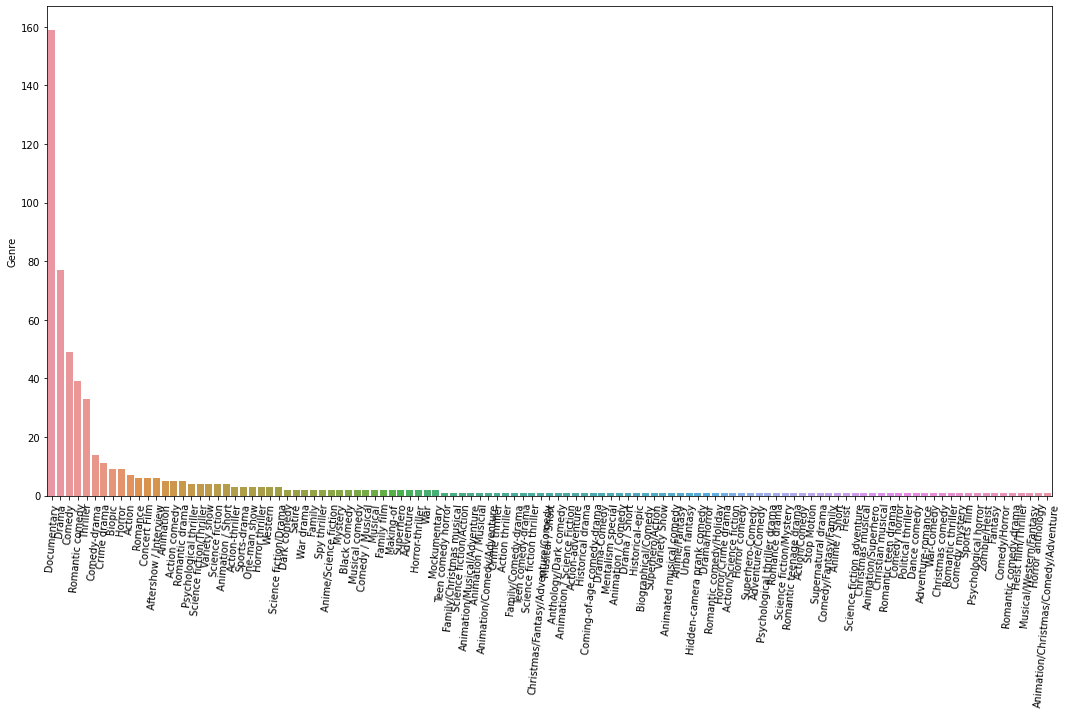

In [ ]:
NetflixGenre= pd.DataFrame(NetflixOriginals['Genre'].value_counts())

plt.figure(figsize = (18,9))
sns.barplot(x = NetflixGenre.index, y = NetflixGenre['Genre'] , data = NetflixGenre)
plt.xticks(rotation = 85)
plt.show()

Veri setindeki filmlerde en çok kullanılan 3 dili sıralıyoruz.

In [ ]:
NetflixOriginals['Language'].value_counts()[0:3]

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

IMDB puanı en yüksek 10 filmi gösteriyoruz.

In [ ]:
NetflixOriginals.sort_values("IMDB Score", ascending= False).head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English,2020-10-04
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,2020-12-08
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018-12-16
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,2015-10-09
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,2018-12-31
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English,2020-05-20
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English,2019-10-23
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English,2017-11-24
573,Klaus,Animation/Christmas/Comedy/Adventure,"November 15, 2019",97,8.2,English,2019-11-15
571,13th,Documentary,"October 7, 2016",100,8.2,English,2016-10-07


IMDB puanı ile "Runtime" arasındaki korelasyonu görselleştiriyoruz.

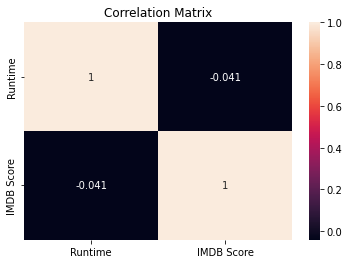

In [ ]:
plt.title('Correlation Matrix')
sns.heatmap(NetflixOriginals.corr(), annot=True)

IMDB puanı en yüksek 10 "Genre"yi görselleştiriyoruz.

In [ ]:
pd.pivot_table(NetflixOriginals, index='Genre', values='IMDB Score').sort_values("IMDB Score", ascending=False).head(10)


,IMDB Score
Genre,
Animation/Christmas/Comedy/Adventure,8.200000
Musical / Short,7.700000
Concert Film,7.633333
Anthology/Dark comedy,7.600000
Animation / Science Fiction,7.500000
Making-of,7.450000
Action-adventure,7.300000
Historical drama,7.200000
Coming-of-age comedy-drama,7.200000


"Runtime"ı en yüksek 10 filmi görselleştiriyoruz.

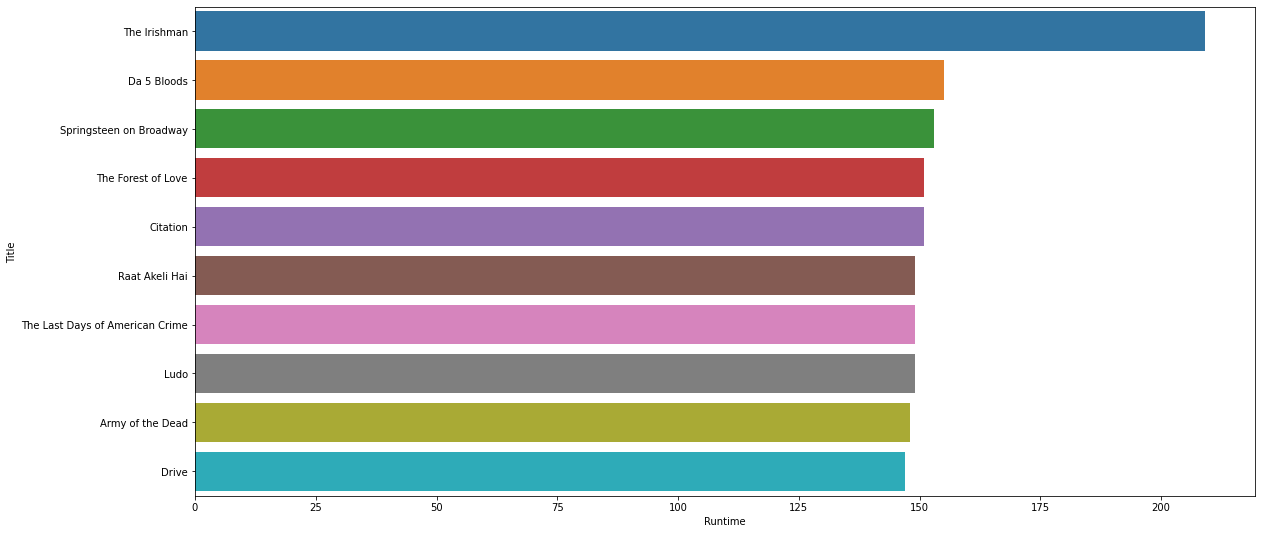

In [ ]:
ilk_10_runtime = NetflixOriginals.groupby("Title").agg({"Runtime": "max"}).sort_values(by = "Runtime", ascending = False)[:10].reset_index()
plt.figure(figsize=(19,9))

sns.barplot(x="Runtime", y="Title", data= ilk_10_runtime)

In [ ]:
Yıllara göre film sayılarını görselleştiriyoruz.

2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: Year, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


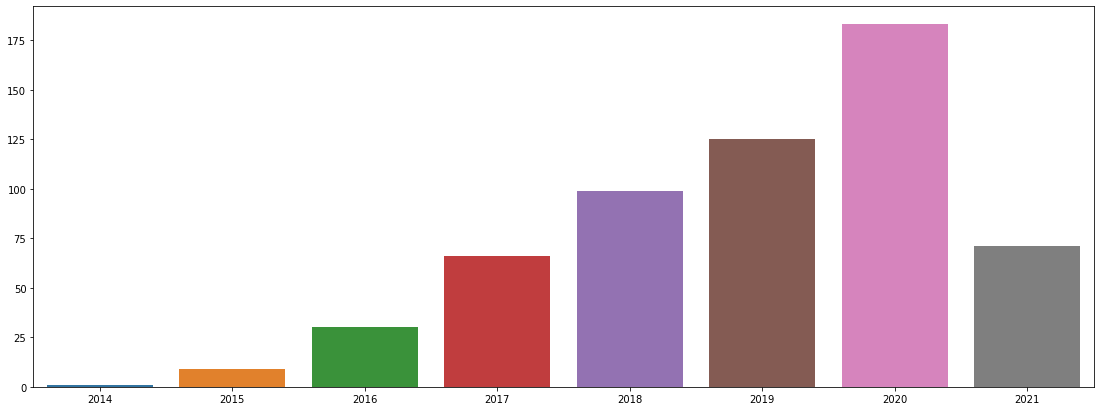

In [ ]:
NetflixOriginals['Year'] = NetflixOriginals['Date'].dt.year
print(NetflixOriginals['Year'].value_counts())

plt.figure(figsize  = (19,7))
sns.barplot(NetflixOriginals['Year'].value_counts().index ,NetflixOriginals['Year'].value_counts().values)
plt.show()

Dillere göre IMDB puanlarını düşükten başlayarak görselleştiriyoruz.

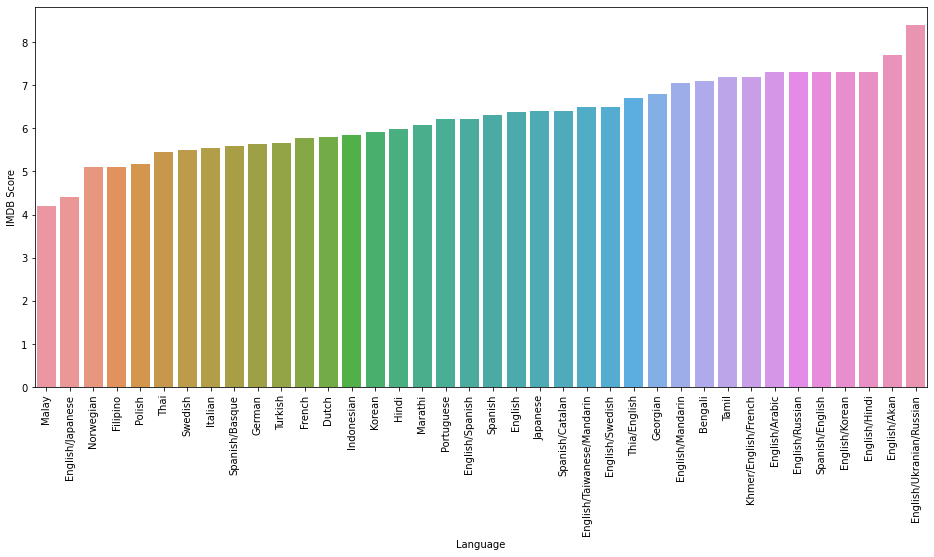

In [ ]:
NetflixOriginals.groupby("Language").agg({"IMDB Score" : "mean"}).sort_values(by = "IMDB Score").head().reset_index()
plt.figure(figsize=(16,7))
plt.xticks(rotation=90)
sns.barplot(x= "Language", y= "IMDB Score", data=NetflixOriginals.groupby("Language").agg({"IMDB Score" : "mean"}).sort_values(by = "IMDB Score").reset_index())


Hangi yılın toplam "Runtime" süresinin en fazla olduğunu buluyoruz.

In [ ]:
pd.pivot_table(NetflixOriginals, index='Year', values='Runtime', aggfunc='sum').sort_values("Runtime", ascending=False).head(1)


,Runtime
Year,
2020,17384


Her bir dilin en fazla kullanıldığı "Genre"yi buluyoruz.

Bundan emin olamadım tam olarak istenilen bu mudur diye. İmran'ın orijinal kodu duruyor ben alta Hashtag ile kendi eklememi yaptım. Hangisinin istenileni verdiğine karar verelim.

In [ ]:
pd.pivot_table(NetflixOriginals, index='Genre', values='Language', aggfunc='count').sort_values("Language", ascending=False).head(1)

#NetflixOriginals.groupby(["Language", "Genre"])["Genre"].count()
    

,Language
Genre,
Documentary,159


* Aykırı değer analizi yaparken görsel açıdan bilgi sahibi olmak için boxplot grafiğini kullanırız.
* Grafiklere baktığımızda bazı değerlerin yüksek olduğunu görüyoruz ancak bu yükseklikler aykırı değer olduğu anlamına gelmeyebilir.
* IMDB puanı grafiğinde boxplot dışında yer alan noktalara aykırı değer diyemeyiz çünkü en fazla 10 olabileceğini biliyoruz.
* Runtime grafiğinde filmlerin süresi belirtilmektedir. Bazı değerlerin diğerlerinden uzak olması aykırı olduğu anlamına gelmez.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


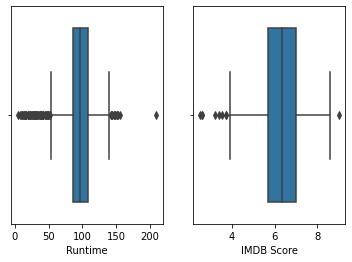

In [ ]:
fig, axs = plt.subplots(ncols=2)
sns.boxplot(NetflixOriginals['Runtime'], ax = axs[0])
sns.boxplot(NetflixOriginals['IMDB Score'], ax = axs[1])
plt.show()
